In [ ]:
import matplotlib.pyplot as plt
import numpy as np 
import scipy as sy
from specutils.manipulation import FluxConservingResampler
import pandas as pd
from scipy import constants

The feture depth is -7.430209341552016e-06 +/- 9.1262573346275e-07 (Rp/Rs)^2
(np.float64(-7.430209341552016e-06), np.float64(9.1262573346275e-07))


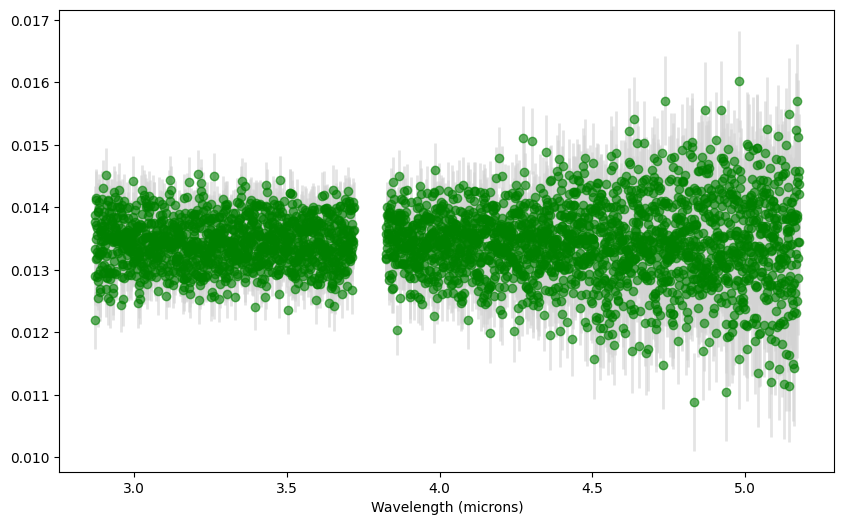

In [ ]:

df = pd.read_csv('Data/archive_data_15.01.26.csv', comment='#')


class PeakFinder:
    def __init__(self):
        self.threshold = 0.5  # example threshold value
        self.feture_top = 5
        self.feture_bottom = 5.4



    def find_peaks(self, data):
        
        mask = data[:, 3] <= 0.001 # take out the bit where the error bars go crazy 
        Proper_datset = data[mask] #data after applying the mask

        Wavelengths= Proper_datset[:,0] # in microns
        Spectrum= Proper_datset[:,2] # data with the noise (Rp/Rs)^2
        error_bars= Proper_datset[:,3] # error bars 

        Top_range_mask= (Wavelengths >= self.feture_top  - self.threshold) & (Wavelengths <= self.feture_top  + self.threshold)
        Bottom_range_mask= (Wavelengths >= self.feture_bottom - self.threshold) & (Wavelengths <= self.feture_bottom + self.threshold)
        Top_range= Spectrum[Top_range_mask]
        Bottom_range= Spectrum[Bottom_range_mask]
        Average_top= np.mean(Top_range)
        Average_bottom= np.mean(Bottom_range)
        Feature_depth= Average_bottom - Average_top
        Top_range_error = error_bars[Top_range_mask]
        Bottom_range_error = error_bars[Bottom_range_mask]
        Top_error= np.sum(Top_range_error**2)/len(Top_range_error)
        Bottom_error= np.sum(Bottom_range_error**2)/len(Bottom_range_error)
        Feature_depth_error= np.sqrt(Top_error**2 + Bottom_error**2)

        print(f"The feture depth is {Feature_depth} +/- {Feature_depth_error} (Rp/Rs)^2")
        return Feature_depth, Feature_depth_error
    

    def Find_A_H(self, peak_height, Error, planet_name):
        R_s = df.loc[df['name'] == planet_name, 'R_s'].values[0] * 6.957e8  # stellar radius in meters
        R_p = df.loc[df['name'] == planet_name, 'R_p'].values[0] * 7.1492e7  # planetary radius in meters
        g_p = df.loc[df['name'] == planet_name, 'g_p'].values[0]  # surface gravity in m/s^2
        mu = 2.3 * 1.66053906660e-27  # mean molecular weight in kg (assuming H2 dominated atmosphere)
        k_B = constants.k  # Boltzmann constant in J/K

        # Calculate scale height H
        H = (k_B * peak_height) / (mu * g_p)

        # Calculate amplitude A_H
        A_H = (2 * R_p * H) / (R_s ** 2)

        # Error propagation for A_H
        dA_H_dH = (2 * R_p) / (R_s ** 2)
        A_H_error = dA_H_dH * Error

        print(f"The amplitude A_H is {A_H} +/- {A_H_error}")
        return A_H, A_H_error


data= np.loadtxt(r'Data/sim_obs.txt') # load the data 
mask = data[:, 3] <= 0.001 # take out the bit where the error bars go crazy 
Proper_datset = data[mask] #data after applying the mask

Wavelengths= Proper_datset[:,0] # in microns
Spectrum= Proper_datset[:,2] # data with the noise (Rp/Rs)^2
error_bars= Proper_datset[:,3] # error bars 

peak = PeakFinder().find_peaks(data)
print(peak)





plt.figure(figsize=(10,6))
#plt.scatter(Wavelengths, Spectrum)
plt.errorbar(Wavelengths, Spectrum, yerr=error_bars, fmt='o', label='Observed Data', zorder= 1, alpha=0.6, color='green', ecolor='lightgray', elinewidth=2, capsize=0)
#plt.ylim(min(data[:,1]), max(data[:,1]))
plt.xlabel('Wavelength (microns)')
plt.legend
plt.show()

[0.0778628  0.25979637 0.23142545 0.76026027 0.55768162 0.27294015
 0.13351213 0.48537852 0.31586047 0.91128723]


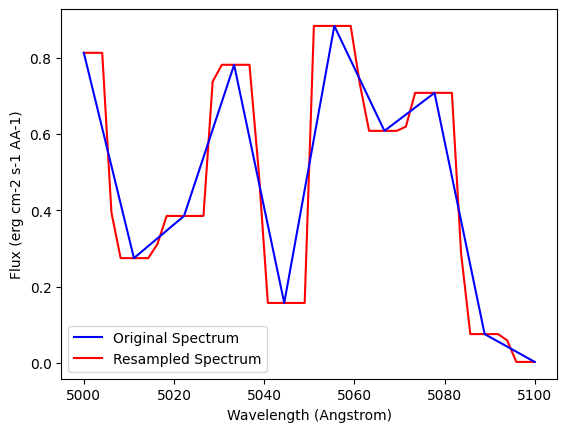

In [58]:
import numpy as np
import astropy.units as u
from specutils import Spectrum
from specutils.manipulation import FluxConservingResampler
import matplotlib.pyplot as plt
print(np.random.random(10))
wave = np.linspace(5000, 5100, 10) * u.AA
#flux = np.random.random(10) * u.Unit("erg cm-2 s-1 AA-1")
flux = np.array([0.81306158, 0.27469256, 0.38526647, 0.78165338, 0.15717256, 0.88356331,
 0.60842991, 0.70807226, 0.07552976, 0.00253725]) * u.Unit("erg cm-2 s-1 AA-1")
spec = Spectrum(spectral_axis=wave, flux=flux)
new_wave = np.linspace(5000, 5100, 50) * u.AA
resampler = FluxConservingResampler()
new_spec = resampler(spec, new_wave)

plt.plot(spec.spectral_axis, spec.flux, zorder= 2, label='Original Spectrum', color='blue')
plt.xlabel("Wavelength (Angstrom)") 
plt.plot(new_spec.spectral_axis, new_spec.flux, label='Resampled Spectrum', color='red', zorder= 1)
plt.ylabel("Flux (erg cm-2 s-1 AA-1)")
plt.legend()
plt.show()